# Carto Le Grand Débat

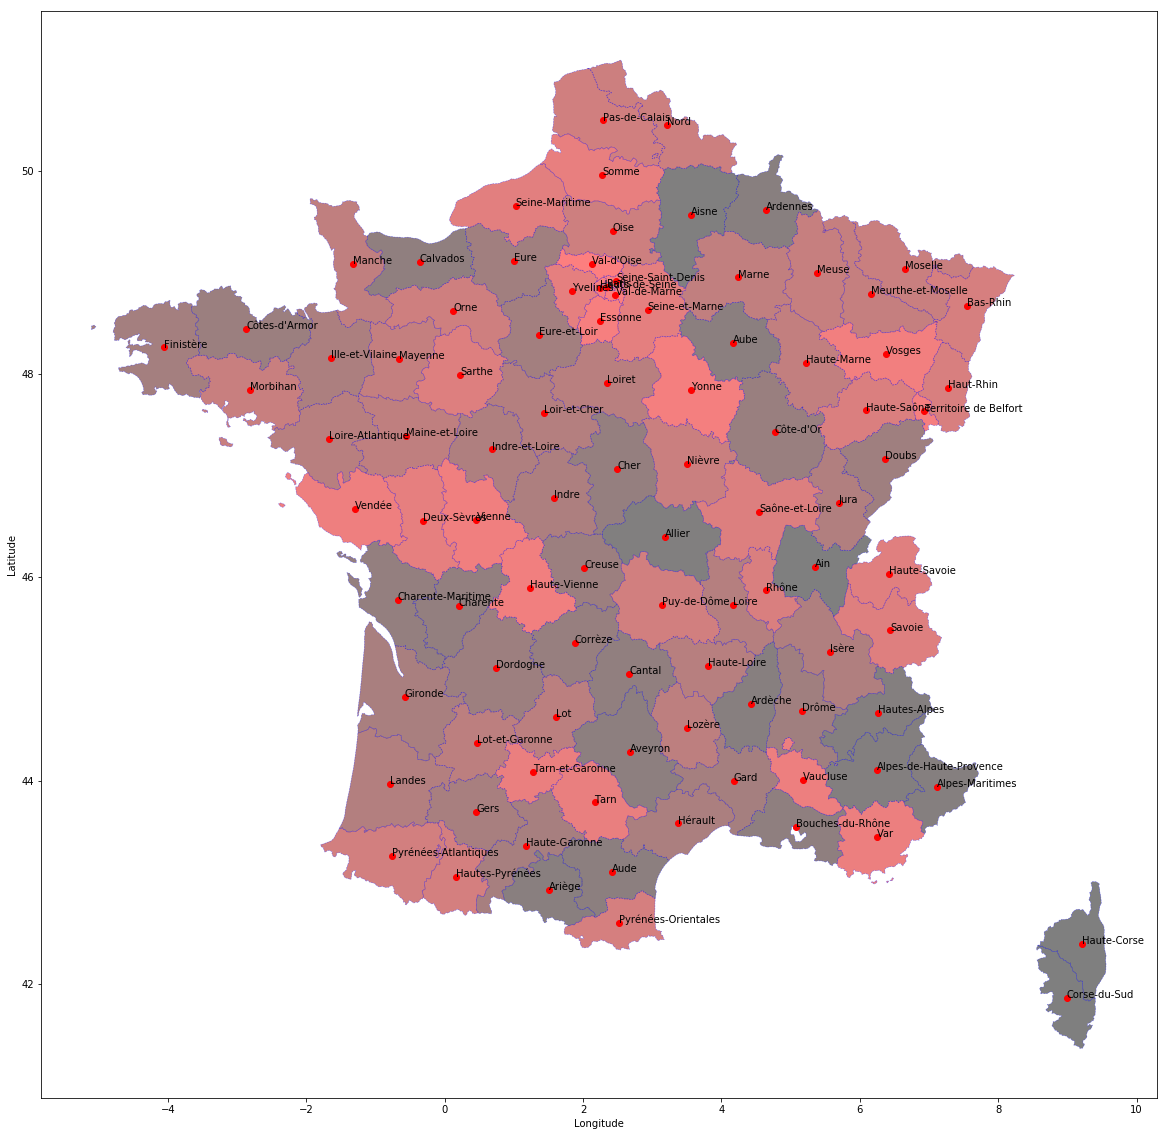

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

from descartes import PolygonPatch
import json 
import scipy as sp
from scipy.sparse import linalg
from shapely.geometry import asShape # manipulating geometry

#Geojson data come from https://catalog.data.gov/dataset/seattle-zip-codes-ebab5
# we plot the map with Descarte package


with open("/Users/veillonpaul-armand/Documents/Projets/Data/Carto/departements-version-simplifiee.geojson") as geojson_file:
    geojson_data = json.load(geojson_file) # or geojson.load(json_file)

fig = plt.figure(figsize=(20,20)) # create a figure to contain the plot elements
ax = fig.gca(xlabel="Longitude", ylabel="Latitude")

n =len(geojson_data["features"])

for feat in geojson_data["features"]:
    try:
        R = (float(int(feat["properties"]["code"]))-1.0)/float(n)
        G = 0
        B = 0
    except:
        R=0
        G=0
        B=0
    # convert the geometry to shapely
    geom = asShape(feat["geometry"])
    # obtain the coordinates of the feature's centroid
    x, y = geom.centroid.x, geom.centroid.y
    # plot the centroids
    ax.plot(x, y, 'ro')
    ax.text(x, y, feat["properties"]["nom"], fontsize=10)
    # plot the polygon features: type help(PolygonPatch) for more args
    ax.add_patch(PolygonPatch(feat["geometry"], facecolor=[R,G,B], ec='blue',
                alpha=0.5, lw=0.5, ls='--', zorder=2))



In [6]:
len(geojson_data["features"])

96

In [8]:
for i in range(len(geojson_data["features"])):
    print(geojson_data["features"][i]['properties'])

{'code': '01', 'nom': 'Ain'}
{'code': '02', 'nom': 'Aisne'}
{'code': '03', 'nom': 'Allier'}
{'code': '04', 'nom': 'Alpes-de-Haute-Provence'}
{'code': '05', 'nom': 'Hautes-Alpes'}
{'code': '06', 'nom': 'Alpes-Maritimes'}
{'code': '07', 'nom': 'Ardèche'}
{'code': '08', 'nom': 'Ardennes'}
{'code': '09', 'nom': 'Ariège'}
{'code': '10', 'nom': 'Aube'}
{'code': '11', 'nom': 'Aude'}
{'code': '12', 'nom': 'Aveyron'}
{'code': '13', 'nom': 'Bouches-du-Rhône'}
{'code': '14', 'nom': 'Calvados'}
{'code': '15', 'nom': 'Cantal'}
{'code': '16', 'nom': 'Charente'}
{'code': '17', 'nom': 'Charente-Maritime'}
{'code': '18', 'nom': 'Cher'}
{'code': '19', 'nom': 'Corrèze'}
{'code': '21', 'nom': "Côte-d'Or"}
{'code': '22', 'nom': "Côtes-d'Armor"}
{'code': '23', 'nom': 'Creuse'}
{'code': '24', 'nom': 'Dordogne'}
{'code': '25', 'nom': 'Doubs'}
{'code': '26', 'nom': 'Drôme'}
{'code': '27', 'nom': 'Eure'}
{'code': '28', 'nom': 'Eure-et-Loir'}
{'code': '29', 'nom': 'Finistère'}
{'code': '2A', 'nom': 'Corse-du-Sud

In [33]:
geojson_data['features'][i]['geometry']['coordinates'][0]


[[4.047972977986833, 49.40564229475753],
 [4.039913351175735, 49.397396867183815],
 [4.035496373111564, 49.359904159430094],
 [4.0127284202980995, 49.358299141243386],
 [3.9949400464231957, 49.37789993445056],
 [3.9613090288565647, 49.37734494086453],
 [3.9252301838116423, 49.40757795776365],
 [3.898159524095673, 49.39324676616779],
 [3.864856156264051, 49.40533685972032],
 [3.837686516500783, 49.39565820991326],
 [3.8563548292895904, 49.381163036761194],
 [3.84805797975596, 49.36391735212325],
 [3.8224705767098395, 49.35696565512036],
 [3.777534921928809, 49.35581577743615],
 [3.7422207217091263, 49.33651301919691],
 [3.6989371212574853, 49.33195284253632],
 [3.643938967409509, 49.31271547683784],
 [3.6573162286122742, 49.291023347068474],
 [3.65525456317135, 49.26285133857558],
 [3.670777136423702, 49.23959850877529],
 [3.662544752146768, 49.20897792079391],
 [3.697104870697589, 49.20547444963648],
 [3.704392046963459, 49.181373023469],
 [3.725444039996693, 49.173515945092305],
 [3.7